<ipython-input-29-fbb422222c29>:70: RuntimeWarning: invalid value encountered in arccos
  yint = rint*np.sin(np.arccos(x/rint))#ordinates of inner circle
<ipython-input-29-fbb422222c29>:70: RuntimeWarning: invalid value encountered in arccos
  yint = rint*np.sin(np.arccos(x/rint))#ordinates of inner circle
<ipython-input-29-fbb422222c29>:70: RuntimeWarning: invalid value encountered in arccos
  yint = rint*np.sin(np.arccos(x/rint))#ordinates of inner circle
<ipython-input-29-fbb422222c29>:70: RuntimeWarning: invalid value encountered in arccos
  yint = rint*np.sin(np.arccos(x/rint))#ordinates of inner circle
<ipython-input-29-fbb422222c29>:70: RuntimeWarning: invalid value encountered in arccos
  yint = rint*np.sin(np.arccos(x/rint))#ordinates of inner circle
<ipython-input-29-fbb422222c29>:70: RuntimeWarning: invalid value encountered in arccos
  yint = rint*np.sin(np.arccos(x/rint))#ordinates of inner circle
<ipython-input-29-fbb422222c29>:70: RuntimeWarning: invalid value encountere

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
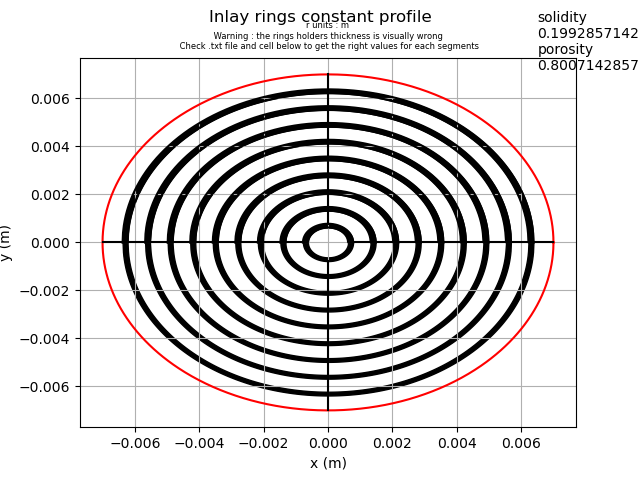

In [29]:
#importing packages

import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display
import ipywidgets as widgets

%matplotlib widget

################################################################################################################################
#parameters, fluid and device properties

nu=1.55e-5# kinematic visc m2/s
rho=1.2  # density kg/m3
mu=nu*rho # dynamic viscosity Pa.s

R=7e-3 #pipe radius m
rmax=R #rmax is the maximal radius

Ub=5 # bulk velocity/mean velocity m/s
Uc=2*Ub # velocity at the centerline m/s
Reb=(Ub*2*R)/nu # general pipe Reynolds number based on bulk velocity 
Remax=50 # maximum local Reynolds number
N=10 # number of steps  
spl=1000 #number of samples that you want to print the rings

################################################################################################################################

# Calculating each middle radius of future rings 


radius=[]
for i in range (N):
    radius.append(i*R/N)
radius.append(rmax) # we choose to add the radius of the pipe

################################################################################################################################
# removal of 0 and rmax

radius2=radius.copy()
del radius2[0]
del radius2[N-1]

################################################################################################################################
#thickness computation

thickness=(50*nu)/Ub

################################################################################################################################

# Plotting rings


plt.figure()

Rint=[]
Rext=[]
Rings_areas=[]

for i in range (N-1):
    rint=radius2[i]-(thickness/2)#definition of rint and rext
    rext=radius2[i]+(thickness/2)
    Rint.append(rint)#saving rint in a list
    Rext.append(rext)#same with rext
    rings_areas=np.pi*((rext**2)-(rint**2))#rings aeras
    Rings_areas.append(rings_areas)
    x=np.linspace(-rext,rext,spl,endpoint=True)
    yext = rext*np.sin(np.arccos(x/rext))#ordinates of outer circle
    yint = rint*np.sin(np.arccos(x/rint))#ordinates of inner circle
    yint[np.isnan(yint)] = 0
    plt.plot(x,yint,color='black')#plot the inner ring with corresponding label
    plt.plot(x,yext,color='black')#same with outer ring 
    plt.fill_between(x, yint, yext, color='black')#filling the area between the cirles to create rings
    plt.fill_between(x, -yext, -yint, color='black')
theta = np.linspace(0, 2*np.pi, spl)#creation of a angles list
plt.plot(R*np.cos(theta),R*np.sin(theta),color='red')#plot of the pipe boundary with a radius of R, only for visualization

plt.plot([radius2[0]+thickness/2,R],[0,0],color='black')#display of the holders between the rings
plt.plot([-(radius2[0]+thickness/2),-R],[0,0],color='black')                    
plt.plot([0,0],[radius2[0]+thickness/2,R],color='black')
plt.plot([0,0],[-(radius2[0]+thickness/2),-R],color='black')

solidity=sum(Rings_areas)/(np.pi*(R**2)) #calculating the solidity
porosity=1-solidity
plt.text(0.0065,0.0065,'solidity\n' f"{solidity}\n"'porosity\n' f"{porosity}\n")#display of the solidity in the plot

plt.xlabel('x (m)')
plt.ylabel('y (m)')

file=open('Inlay_specifications_constant_profile.txt','w')#saving the rint and rext data in a .txt file
file.write("rint (m)\n")
for d in Rint:
    file.write(f"{d}\n")
file.write("\nrext (m)\n")  
for d in Rext:
    file.write(f"{d}\n")
file.write("\nthickness of the rings holders (m)\n")
file.write(f"{thickness}\n")
file.write("\nsolidity\n")
file.write(f"{solidity}")
file.write("\nporosity\n")
file.write(f"{porosity}")
file.close()

plt.suptitle('Inlay rings constant profile')
plt.title('r units : m\n Warning : the rings holders thickness is visually wrong \n Check .txt file and cell below to get the right values for each segments',fontsize=6)
plt.grid()
plt.show()
plt.savefig('Inlay constant profile',format='jpg')
#saving the figure in the format that you want :eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff